In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")
pd.options.display.max_rows = 100

## Data structuring

#### Importing data.csv

In [2]:
root_dir = os.path.dirname(os.getcwd())
data_clean = pd.read_csv("{}/data/data_E3_100def.csv".format(root_dir))
data_clean

,subject_id,stimulus,trial_type,time_elapsed,gender,age,language,country,sampling,turkcode,...,responses,stim_type,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,instruction,causal-graph1,25164,male,48,English,United States of America,Right,R562290197760gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,instruction,causal-graph1,42649,male,48,English,United States of America,Right,R562290197760gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,instruction,causal-graph1,90566,male,48,English,United States of America,Right,R562290197760gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,instruction,causal-graph1,97178,male,48,English,United States of America,Right,R562290197760gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,instruction,causal-graph1,108337,male,48,English,United States of America,Right,R562290197760gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,27,chainC_RT,causal-graph1,1040689,male,41,English,United States of America,Right,R566082387590gxrw,...,NaN,ChainC,NaN,Top,NaN,NaN,NaN,NaN,NaN,nodeA26
1505,27,UAAS_RT,causal-graph1,1053849,male,41,English,United States of America,Right,R566082387590gxrw,...,NaN,AND_Gate,Unrolled,Top,Squares,Event,NaN,A,A,nodeA7
1506,27,RBC_RB,causal-graph3,1076057,male,41,English,United States of America,Right,R566082387590gxrw,...,NaN,AND_Gate,Rolled,Bottom,Circles,State,B,NaN,A,nodeA4
1507,27,instruction,causal-graph1,1078545,male,41,English,United States of America,Right,R566082387590gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
time = []
for item in data_clean[data_clean['stimulus']=='comment']['time_elapsed']:
    time.append(item)
time = np.array(time)
time.mean()/1000/60

16.261987037037038

In [4]:
for idx,item in enumerate(data_clean['stimulus']):
    if item == 'comment':
        print(data_clean['responses'][idx])

{"Q0":"Thank you for the fun task!"}
{"Q0":"interesting HIT"}
{"Q0":""}
{"Q0":"Nice task."}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":"Nice task."}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":"This was an interesting hit, very unusual hit. Thanks!"}
{"Q0":"Very nice"}
{"Q0":""}
{"Q0":""}
{"Q0":"Enjoyed this simple HIT."}
{"Q0":""}
{"Q0":""}
{"Q0":"very good in the game"}
{"Q0":"was interesting thanks for the opportunity, thanks a lot, stay safe"}
{"Q0":""}
{"Q0":""}
{"Q0":"no problems"}
{"Q0":""}
{"Q0":"good"}
{"Q0":""}


#### Demographical data only

In [5]:
data_demog = data_clean[["subject_id","gender","age","language","country","turkcode"]]
data_demog.head()

,subject_id,gender,age,language,country,turkcode
0,1,male,48,English,United States of America,R562290197760gxrw
1,1,male,48,English,United States of America,R562290197760gxrw
2,1,male,48,English,United States of America,R562290197760gxrw
3,1,male,48,English,United States of America,R562290197760gxrw
4,1,male,48,English,United States of America,R562290197760gxrw


#### Target stimuli only (instructions deleted)

In [6]:
data = data_clean[["subject_id","rt","stimulus","trial_type","sampling","nb_of_run","stim_type","rolled_OR_unrolled",
                   "A_branch_loc","A_detectors","state_OR_event","state_branch","root_1st","imdt_2nd","node_selected"]]
data = data[data["stimulus"] != "instruction"].drop(['trial_type'],axis=1)
data.reset_index(drop=True,inplace=True)

data.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,14310.860,RBC_RB,Right,2.0,AND_Gate,Rolled,Bottom,Circles,State,B,NaN,A,nodeB7
1,1,10611.160,UBAC_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Circles,Event,NaN,B,A,nodeB4
2,1,12832.375,UAAS_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeA7
3,1,10878.835,UBAS_RT,Right,1.0,AND_Gate,Unrolled,Top,Squares,Event,NaN,B,A,nodeB4
4,1,10597.255,UBC_RT,Right,2.0,AND_Gate,Unrolled,Top,Circles,State,B,NaN,A,nodeA20


In [7]:
data[:50]

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,14310.860,RBC_RB,Right,2.0,AND_Gate,Rolled,Bottom,Circles,State,B,NaN,A,nodeB7
1,1,10611.160,UBAC_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Circles,Event,NaN,B,A,nodeB4
2,1,12832.375,UAAS_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeA7
3,1,10878.835,UBAS_RT,Right,1.0,AND_Gate,Unrolled,Top,Squares,Event,NaN,B,A,nodeB4
4,1,10597.255,UBC_RT,Right,2.0,AND_Gate,Unrolled,Top,Circles,State,B,NaN,A,nodeA20
5,1,9929.385,chainS_R,Right,1.0,ChainS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nodeB9
6,1,14352.415,UABS_RT,Right,1.0,AND_Gate,Unrolled,Top,Squares,Event,NaN,A,B,nodeA7
7,1,2795.490,RAAC_RT,Right,2.0,AND_Gate,Rolled,Top,Circles,Event,NaN,A,A,nodeA5
8,1,8867.380,chainC_RB,Right,1.0,ChainC,NaN,Bottom,NaN,NaN,NaN,NaN,NaN,nodeA26
9,1,10886.420,UAAC_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Circles,Event,NaN,A,A,nodeA7


#### Chain only

In [8]:
data_chain = data[(data["stim_type"]=="ChainS")|(data["stim_type"]=="ChainC")].drop(["rolled_OR_unrolled","A_detectors",
                                                    "state_OR_event","state_branch","root_1st","imdt_2nd",],axis=1)
data_chain.reset_index(drop=True,inplace=True)
data_chain["stimulus"] = data_chain["stimulus"].astype("category")
data_chain["sampling"] = data_chain["sampling"].astype("category")
data_chain["stim_type"] = data_chain["stim_type"].astype("category")
data_chain.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,A_branch_loc,node_selected
0,1,9929.385,chainS_R,Right,1.0,ChainS,NaN,nodeB9
1,1,8867.380,chainC_RB,Right,1.0,ChainC,Bottom,nodeA26
2,2,9365.000,chainS_L,Left,1.0,ChainS,NaN,nodeB19
3,2,9452.000,chainC_LT,Left,1.0,ChainC,Top,nodeA41
4,3,10148.285,chainC_RB,Right,2.0,ChainC,Bottom,nodeA26


#### AND-Gate only

In [9]:
data_AND_Gate = data[data["stim_type"]=="AND_Gate"].drop(["stim_type"],axis=1)
data_AND_Gate.reset_index(drop=True,inplace=True)
data_AND_Gate["stimulus"] = data_AND_Gate["stimulus"].astype("category")
data_AND_Gate["state_OR_event"] = data_AND_Gate["state_OR_event"].astype("category")
data_AND_Gate["rolled_OR_unrolled"] = data_AND_Gate["rolled_OR_unrolled"].astype("category")
data_AND_Gate["A_branch_loc"] = data_AND_Gate["A_branch_loc"].astype("category")
data_AND_Gate["A_detectors"] = data_AND_Gate["A_detectors"].astype("category")
data_AND_Gate["root_1st"] = data_AND_Gate["root_1st"].astype("category")
data_AND_Gate["imdt_2nd"] = data_AND_Gate["imdt_2nd"].astype("category")
data_AND_Gate

,subject_id,rt,stimulus,sampling,nb_of_run,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,14310.860,RBC_RB,Right,2.0,Rolled,Bottom,Circles,State,B,NaN,A,nodeB7
1,1,10611.160,UBAC_RB,Right,1.0,Unrolled,Bottom,Circles,Event,NaN,B,A,nodeB4
2,1,12832.375,UAAS_RB,Right,1.0,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeA7
3,1,10878.835,UBAS_RT,Right,1.0,Unrolled,Top,Squares,Event,NaN,B,A,nodeB4
4,1,10597.255,UBC_RT,Right,2.0,Unrolled,Top,Circles,State,B,NaN,A,nodeA20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,27,8941.630,UAS_RB,Right,1.0,Unrolled,Bottom,Squares,State,A,NaN,B,nodeB7
347,27,10397.350,UBAS_RT,Right,1.0,Unrolled,Top,Squares,Event,NaN,B,A,nodeB4
348,27,10954.495,RAC_RB,Right,2.0,Rolled,Bottom,Circles,State,A,NaN,A,nodeB7
349,27,12343.540,UAAS_RT,Right,1.0,Unrolled,Top,Squares,Event,NaN,A,A,nodeA7


## Functions

In [10]:
def nb(letter,lower_bound,upper_bound):
    return [letter+str(i) for i in range(lower_bound,upper_bound+1)]

def chain_node_cat(stim,node):
    stim = stim.split('_')[0]
    node = node[4:]
    if stim == 'chainS':
        categories = {'INACT':nb('B',1,8),'ROOT':['B9'],'INBTW':nb('B',10,18),'IMDT':['B19'],'EFFECT':['B20']}
    elif stim == 'chainC':
        categories = {'INACT':nb('A',1,25),'ROOT':['A26'],'INBTW':nb('A',27,40),'IMDT':['A41'],'EFFECT':['B20']}
        
    category = [cat for cat,nd in categories.items() if node in nd][0]
    
    return category

def branch_node_cat(stim,node):
    node = node[4:]
    stim = stim.split('_')[0]
    if stim == 'RAAC':
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,5),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A6'],'ROOT_2nd':['B7'],'INBTW_1st':nb('A',7,19),
            'INBTW_2nd':nb('B',8,18),'IMDT_1st':['B19'],'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RAC':
        categories = {'UNKNOWN':nb('A',1,19),'INACT_1st':[],'INACT_2nd':nb('B',1,6),'ROOT_1st':[],'ROOT_2nd':['B7'],'INBTW_1st':[],
            'INBTW_2nd':nb('B',8,18),'IMDT_1st':['B19'],'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RBAC': 
        categories = {'UNKNOWN':[],'INACT_1st':['B1'],'INACT_2nd':nb('A',1,17),'ROOT_1st':['B2'],'ROOT_2nd':['A18'],'INBTW_1st':nb('B',3,18),
            'INBTW_2nd':['A19'],'IMDT_1st':['B19'],'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RBC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,6),'INACT_2nd':nb('A',1,3),'ROOT_1st':['B7'],'ROOT_2nd':['A4'],'INBTW_1st':nb('B',8,18),
            'INBTW_2nd':nb('A',5,19),'IMDT_1st':['B19'],'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'UAAC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,6),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A7'],'ROOT_2nd':['B7'],'INBTW_1st':nb('A',8,40),
            'INBTW_2nd':nb('B',8,18),'IMDT_1st':['B19'],'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UAAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,6),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A7'],'ROOT_2nd':['B7'],'INBTW_1st':nb('A',8,40),
            'INBTW_2nd':nb('B',8,18),'IMDT_1st':['B19'],'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UABS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,6),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A7'],'ROOT_2nd':['B7'],'INBTW_1st':nb('A',8,40),
            'INBTW_2nd':nb('B',8,18),'IMDT_1st':['A41'],'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,6),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A7'],'ROOT_2nd':['B7'],'INBTW_1st':nb('A',8,40),
            'INBTW_2nd':nb('B',8,18),'IMDT_1st':['A41'],'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UBAC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,3),'INACT_2nd':nb('A',1,19),'ROOT_1st':['B4'],'ROOT_2nd':['A20'],'INBTW_1st':nb('B',5,18),
            'INBTW_2nd':nb('A',21,40),'IMDT_1st':['B19'],'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,3),'INACT_2nd':nb('A',1,19),'ROOT_1st':['B4'],'ROOT_2nd':['A20'],'INBTW_1st':nb('B',5,18),
            'INBTW_2nd':nb('A',21,40),'IMDT_1st':['B19'],'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBBS': 
        categories = {'UNKNOWN':[],'INACT_1st':['B1'],'INACT_2nd':nb('A',1,36),'ROOT_1st':['B2'],'ROOT_2nd':['A37'],'INBTW_1st':nb('B',3,18),
            'INBTW_2nd':nb('A',38,40),'IMDT_1st':['A41'],'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UBC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,3),'INACT_2nd':nb('A',1,19),'ROOT_1st':['B4'],'ROOT_2nd':['A20'],'INBTW_1st':nb('B',5,18),
            'INBTW_2nd':nb('A',21,40),'IMDT_1st':['B19'],'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,3),'INACT_2nd':nb('A',1,19),'ROOT_1st':['B4'],'ROOT_2nd':['A20'],'INBTW_1st':nb('B',5,18),
            'INBTW_2nd':nb('A',21,40),'IMDT_1st':['B19'],'IMDT_2nd':['A41'],'EFFECT':['B20']}

    category = [cat for cat,nd in categories.items() if node in nd][0]

    return category

class AndGate(object):

    def __init__(self,rolled=False,continuity='root_1st'):
        if rolled == False:
            data = data_AND_Gate[data_AND_Gate["rolled_OR_unrolled"]=="Unrolled"]
        elif rolled == True:
            data = data_AND_Gate[data_AND_Gate["rolled_OR_unrolled"]=="Rolled"]
        if continuity == 'root_1st':
            data = data[data['root_1st']==data['imdt_2nd']]
        elif continuity == 'root_2nd':
            data = data[(data['root_1st']!=data['imdt_2nd'])|(data['state_OR_event']=='State')]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["nodeA"+str(i+1) for i in range(41)]+["nodeB"+str(i+1) for i in range(20)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['UNKNOWN','INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None,state=None,root_1st=None,state_branch=None,A_detectors=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == "top":
            self.df = self.df[self.df["A_branch_loc"]=="Top"]
        elif level == "bottom":
            self.df = self.df[self.df["A_branch_loc"]=="Bottom"]
        if A_detectors == "squares":
            self.df = self.df[self.df["A_detectors"]=="Squares"]
        elif A_detectors == "circles":
            self.df = self.df[self.df["A_detectors"]=="Circles"]
        if state == False:
            self.df = self.df[self.df["state_OR_event"]=="Event"]
        elif state == True:
            self.df = self.df[self.df["state_OR_event"]=="State"]
        if root_1st == 'A':
            self.df = self.df[self.df["root_1st"]=="A"]
        elif root_1st == 'B':
            self.df = self.df[self.df["root_1st"]=="B"]
        if state_branch == 'A':
            self.df = self.df[self.df["state_branch"]=="A"]
        if state_branch == 'B':
            self.df = self.df[self.df["state_branch"]=="B"]
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["nodeA"+str(i+1) for i in range(41)]+["nodeB"+str(i+1) for i in range(20)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['UNKNOWN','INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
class Chain(object):
    def __init__(self,stim=None):
        data = data_chain[data_chain["stim_type"] == stim]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        if stim == 'ChainS':
            nodes = ["nodeB"+str(i+1) for i in range(20)]
        elif stim == 'ChainC':
            nodes = ["nodeA"+str(i+1) for i in range(41)]+['nodesB20']
            
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == 'top':
            self.df = self.df[self.df['A_branch_loc']=='Top']
        elif level == 'bottom':
            self.df = self.df[self.df['A_branch_loc']=='Bottom']
            
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        stim = self.df['stim_type'].cat.remove_unused_categories().cat.categories[0]
        if stim == 'ChainS':
            nodes = ["nodeB"+str(i+1) for i in range(20)]
        elif stim == 'ChainC':
            nodes = ["nodeA"+str(i+1) for i in range(41)]+['nodesB20']
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
def graph(list_of_data,title,x_axis='node_category'):
    fig = plt.figure(figsize=(6.6*len(list_of_data),5))
    a = str(len(list_of_data))
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.set_ylim([0,110])
        axis.set_ylabel("Percentage of responses")
        axis.label_outer()
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_title(title[i])
        if x_axis == 'node_selected':
            axis.set_xlabel("Detectors",labelpad=20)
            x.node_select.plot.bar(ax=axis)  
        elif x_axis == 'node_category':
            axis.set_xlabel("Location of the cause",labelpad=20)
            x.node_category.plot.bar(ax=axis)

In [11]:
data_chain['node_category'] = data_chain.apply(lambda x: chain_node_cat(x['stimulus'],x['node_selected']),axis=1)
data_chain['node_category'] = data_chain['node_category'].astype('category')
data_AND_Gate['node_category'] = data_AND_Gate.apply(lambda x: branch_node_cat(x['stimulus'],x['node_selected']),axis=1)
data_AND_Gate['node_category'] = data_AND_Gate['node_category'].astype('category')

In [12]:
data_chain

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,A_branch_loc,node_selected,node_category
0,1,9929.385,chainS_R,Right,1.0,ChainS,NaN,nodeB9,ROOT
1,1,8867.380,chainC_RB,Right,1.0,ChainC,Bottom,nodeA26,ROOT
2,2,9365.000,chainS_L,Left,1.0,ChainS,NaN,nodeB19,IMDT
3,2,9452.000,chainC_LT,Left,1.0,ChainC,Top,nodeA41,IMDT
4,3,10148.285,chainC_RB,Right,2.0,ChainC,Bottom,nodeA26,ROOT
5,3,14157.405,chainS_R,Right,2.0,ChainS,NaN,nodeB9,ROOT
6,4,8545.675,chainS_R,Right,1.0,ChainS,NaN,nodeB9,ROOT
7,4,10842.480,chainC_RT,Right,2.0,ChainC,Top,nodeA26,ROOT
8,5,9448.555,chainC_LT,Left,1.0,ChainC,Top,nodeA41,IMDT
9,5,10578.030,chainS_L,Left,1.0,ChainS,NaN,nodeB9,ROOT


In [13]:
data_AND_Gate

,subject_id,rt,stimulus,sampling,nb_of_run,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected,node_category
0,1,14310.860,RBC_RB,Right,2.0,Rolled,Bottom,Circles,State,B,NaN,A,nodeB7,ROOT_1st
1,1,10611.160,UBAC_RB,Right,1.0,Unrolled,Bottom,Circles,Event,NaN,B,A,nodeB4,ROOT_1st
2,1,12832.375,UAAS_RB,Right,1.0,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeA7,ROOT_1st
3,1,10878.835,UBAS_RT,Right,1.0,Unrolled,Top,Squares,Event,NaN,B,A,nodeB4,ROOT_1st
4,1,10597.255,UBC_RT,Right,2.0,Unrolled,Top,Circles,State,B,NaN,A,nodeA20,ROOT_2nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,27,8941.630,UAS_RB,Right,1.0,Unrolled,Bottom,Squares,State,A,NaN,B,nodeB7,ROOT_2nd
347,27,10397.350,UBAS_RT,Right,1.0,Unrolled,Top,Squares,Event,NaN,B,A,nodeB4,ROOT_1st
348,27,10954.495,RAC_RB,Right,2.0,Rolled,Bottom,Circles,State,A,NaN,A,nodeB7,ROOT_2nd
349,27,12343.540,UAAS_RT,Right,1.0,Unrolled,Top,Squares,Event,NaN,A,A,nodeA7,ROOT_1st


## General comparison

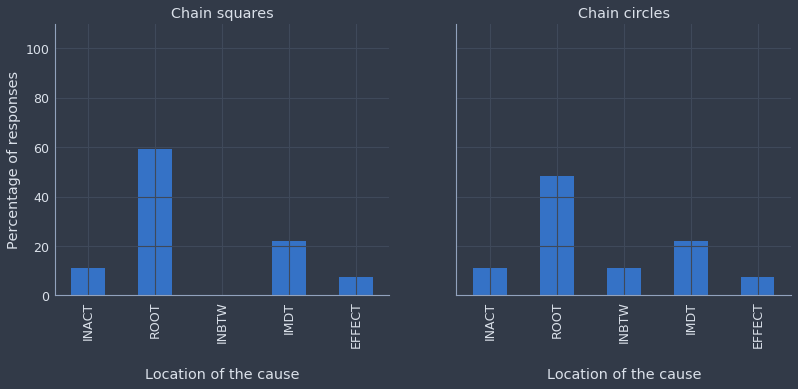

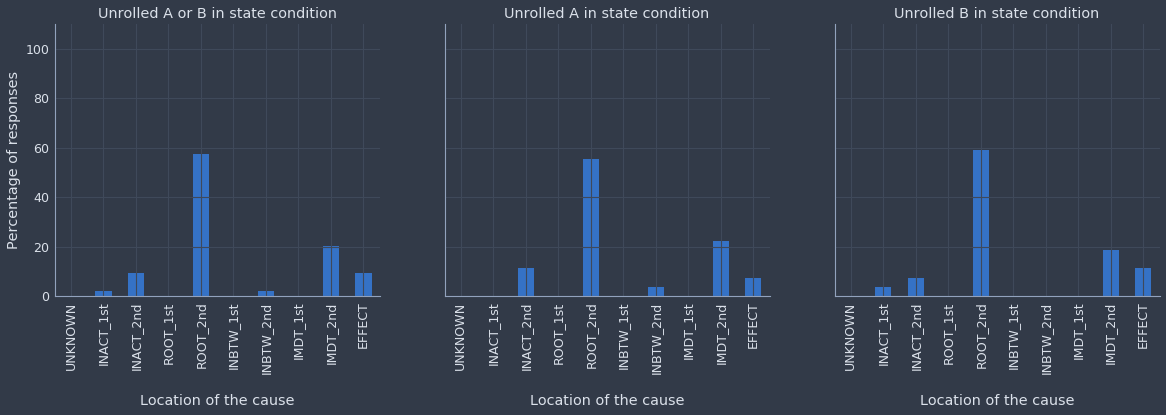

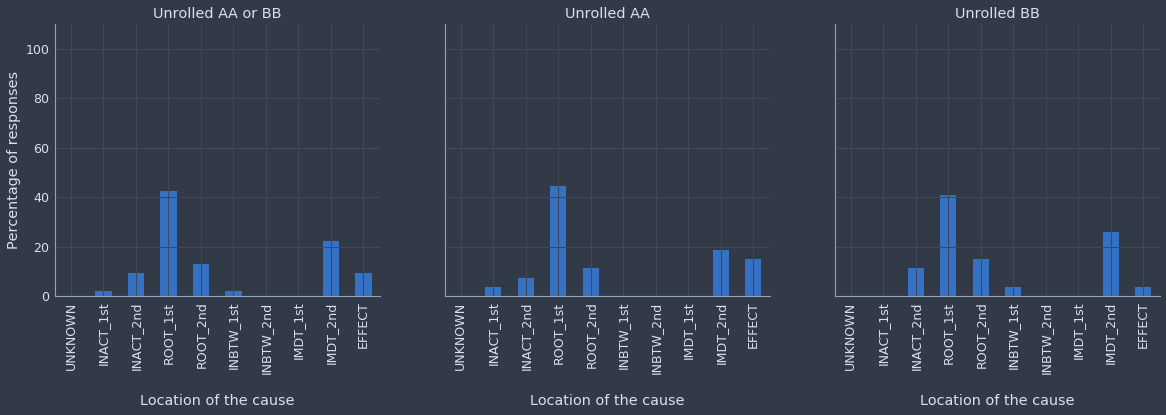

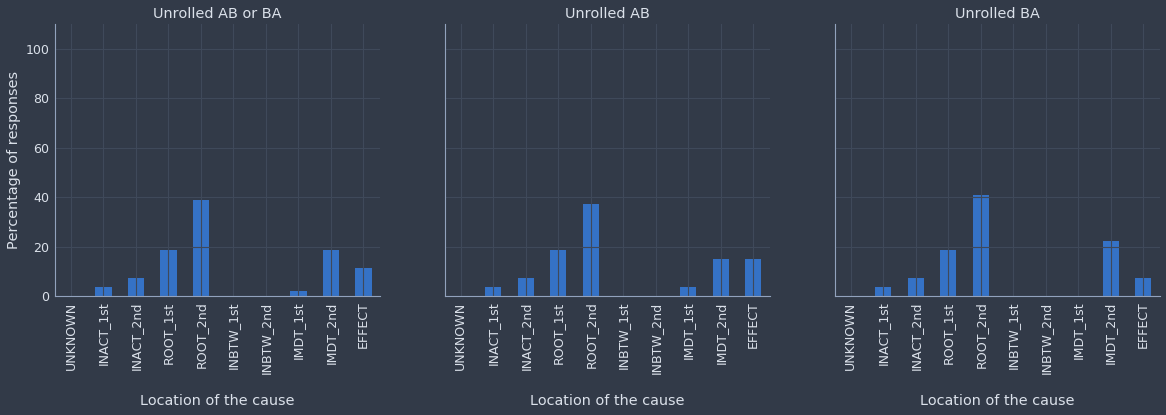

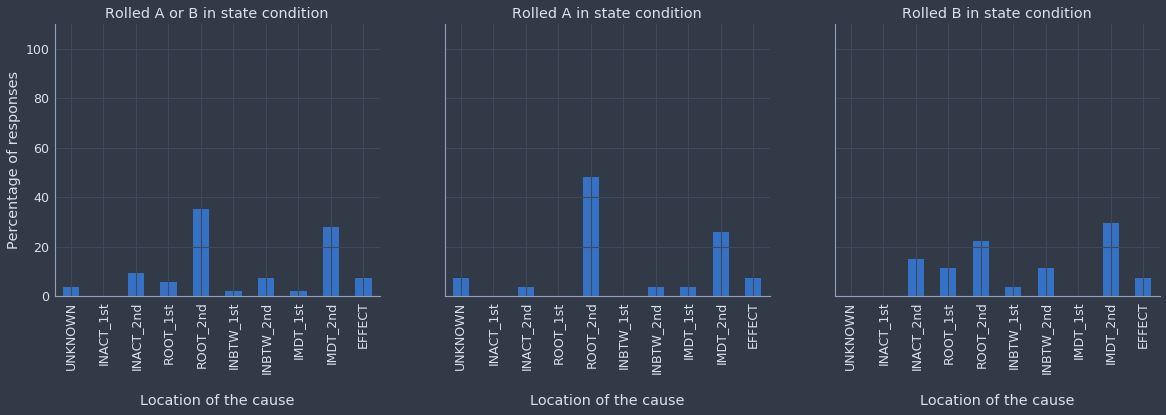

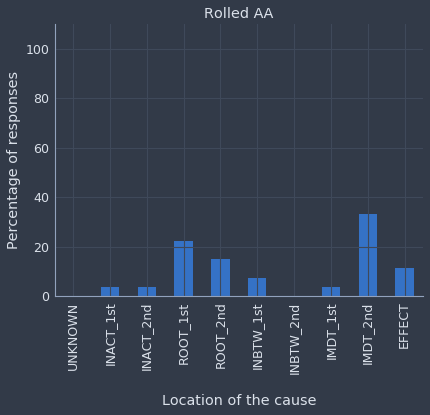

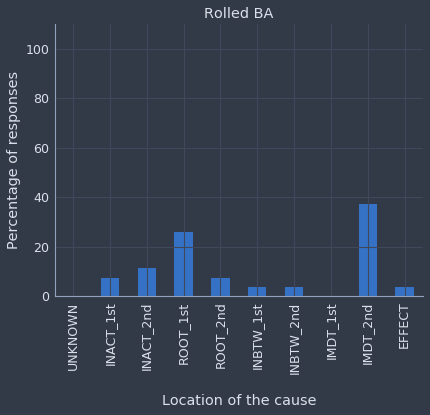

In [14]:
# Only graphs with SQUARES for branch A

chainS = Chain(stim='ChainS')
chainC = Chain(stim='ChainC')
Unrolled_state = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True)
Unrolled_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True,state_branch='A')
Unrolled_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True,state_branch='B')
Unrolled_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares')
Unrolled_AA = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',root_1st='A')
Unrolled_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',root_1st='B')
Unrolled_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False)
Unrolled_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False,root_1st='A')
Unrolled_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False,root_1st='B')
Rolled_state = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True)
Rolled_stateA = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True,state_branch='A')
Rolled_stateB = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True,state_branch='B')
Rolled_AA = AndGate(rolled=True,continuity='root_1st')
Rolled_BA = AndGate(rolled=True,continuity='root_2nd').add_filter(state=False)

graph([chainS,chainC],['Chain squares','Chain circles'])
graph([Unrolled_state,Unrolled_stateA,Unrolled_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([Unrolled_AA_BB,Unrolled_AA,Unrolled_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([Unrolled_AB_BA,Unrolled_AB,Unrolled_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])
graph([Rolled_state,Rolled_stateA,Rolled_stateB],['Rolled A or B in state condition','Rolled A in state condition','Rolled B in state condition'])
graph([Rolled_AA],['Rolled AA'])
graph([Rolled_BA],['Rolled BA'])

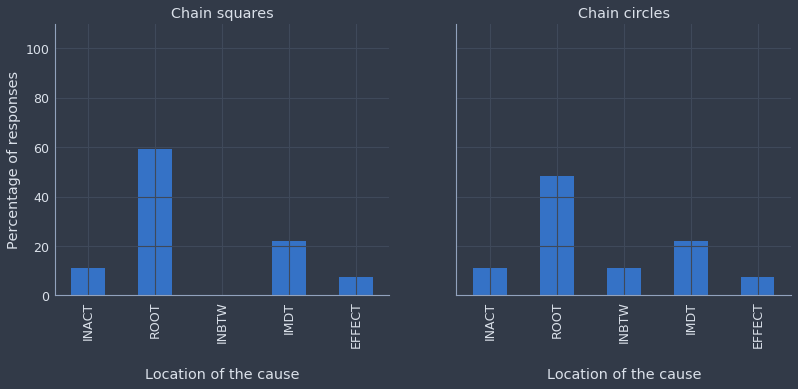

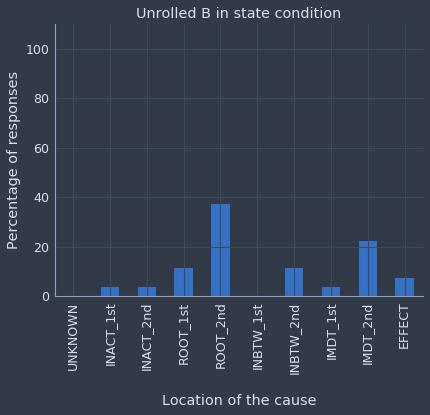

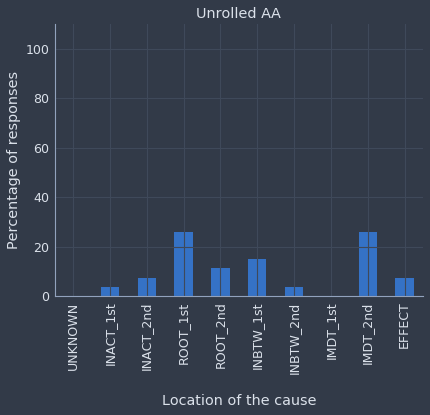

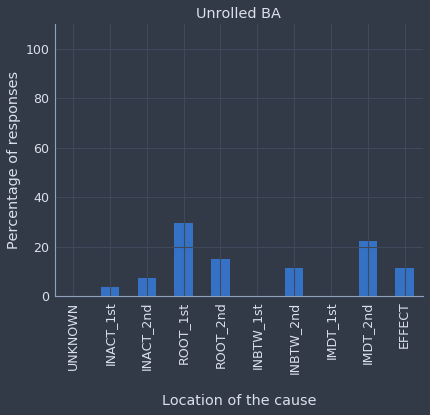

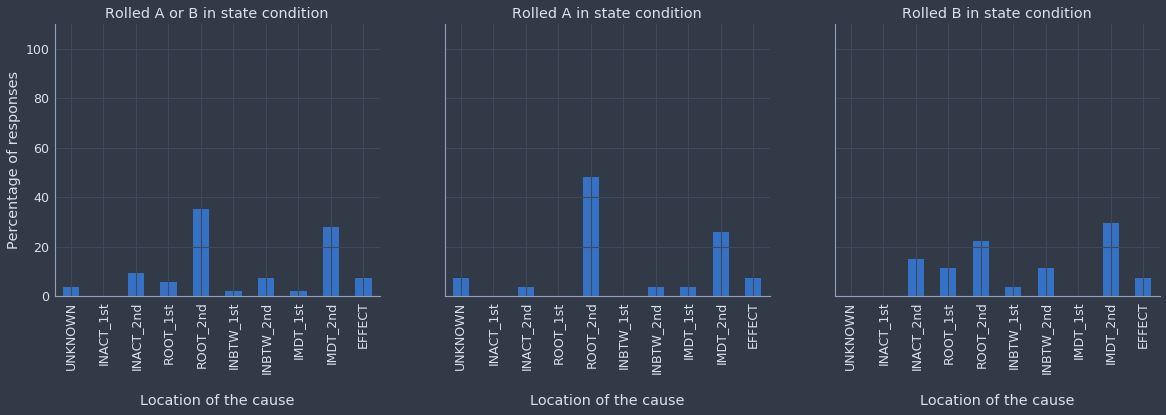

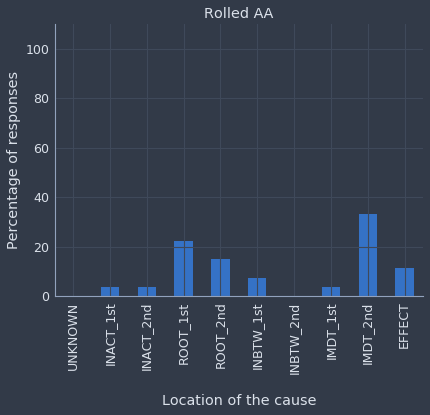

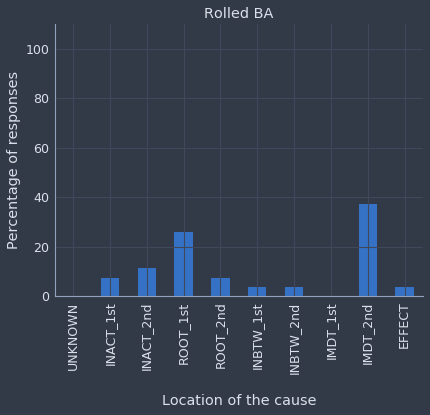

In [15]:
# Only graphs with CIRCLES for branch A

chainS = Chain(stim='ChainS')
chainC = Chain(stim='ChainC')
Unrolled_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='circles',state=True,state_branch='B')
Unrolled_AA = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='circles',root_1st='A')
Unrolled_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='circles',state=False,root_1st='B')
Rolled_state = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True)
Rolled_stateA = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True,state_branch='A')
Rolled_stateB = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True,state_branch='B')
Rolled_AA = AndGate(rolled=True,continuity='root_1st')
Rolled_BA = AndGate(rolled=True,continuity='root_2nd').add_filter(state=False)

graph([chainS,chainC],['Chain squares','Chain circles'])
graph([Unrolled_stateB],['Unrolled B in state condition'])
graph([Unrolled_AA],['Unrolled AA'])
graph([Unrolled_BA],['Unrolled BA'])
graph([Rolled_state,Rolled_stateA,Rolled_stateB],['Rolled A or B in state condition','Rolled A in state condition','Rolled B in state condition'])
graph([Rolled_AA],['Rolled AA'])
graph([Rolled_BA],['Rolled BA'])

## Comparison Right *vs* Left

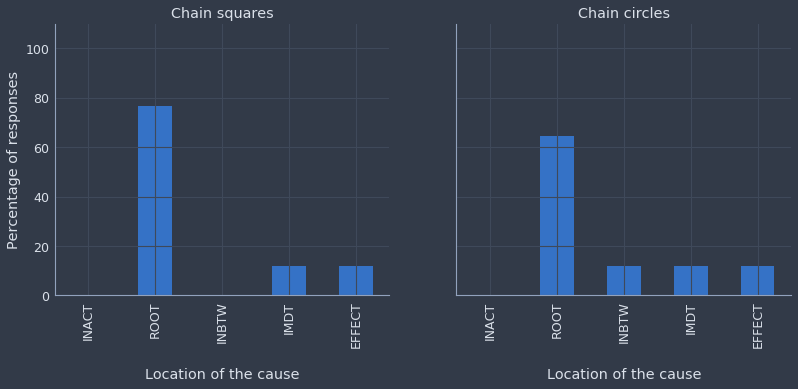

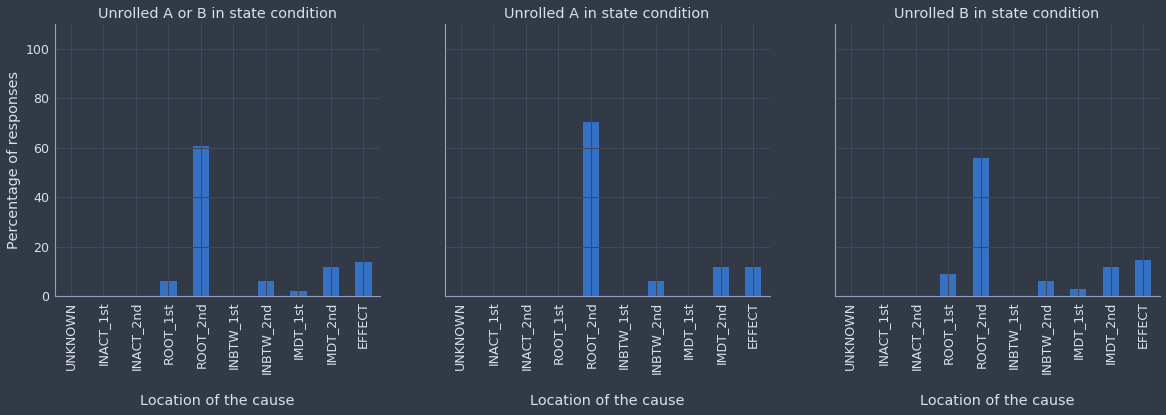

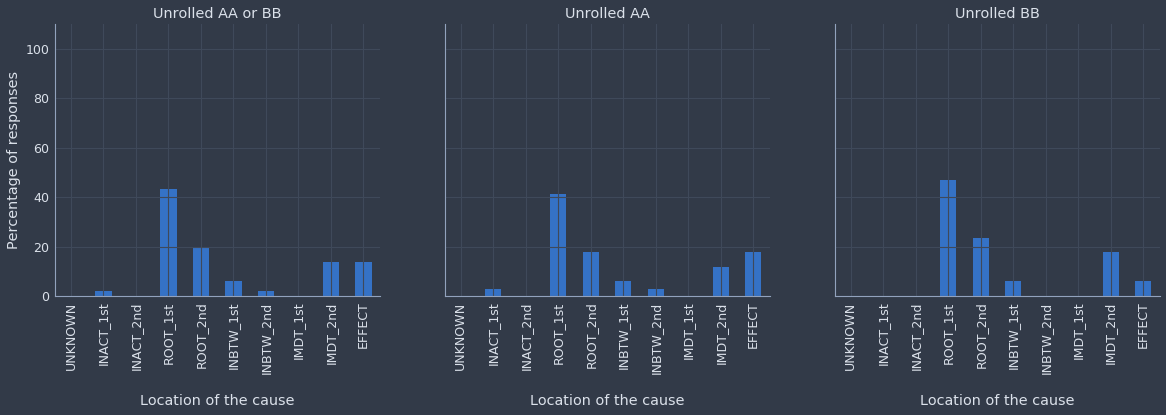

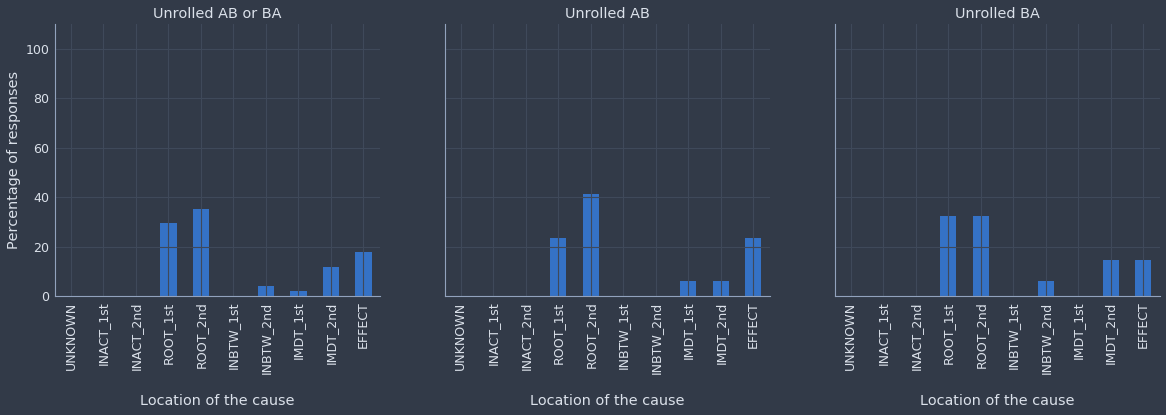

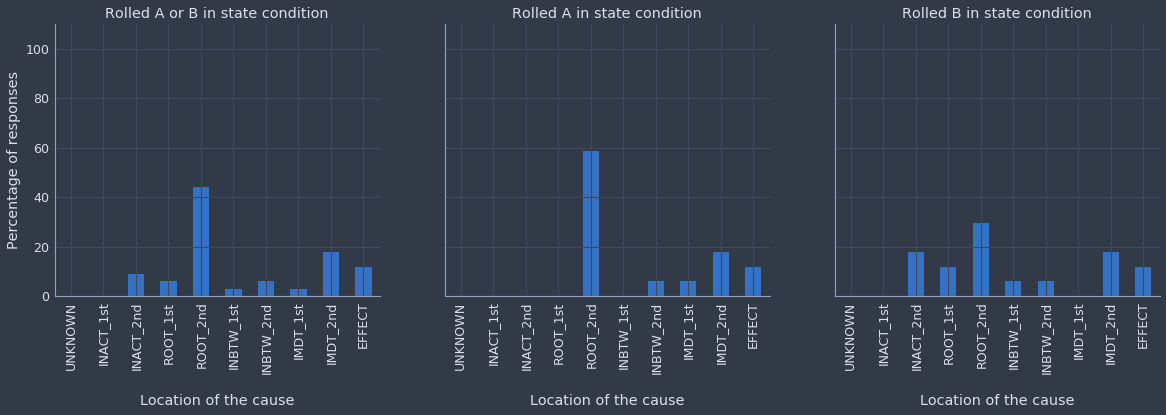

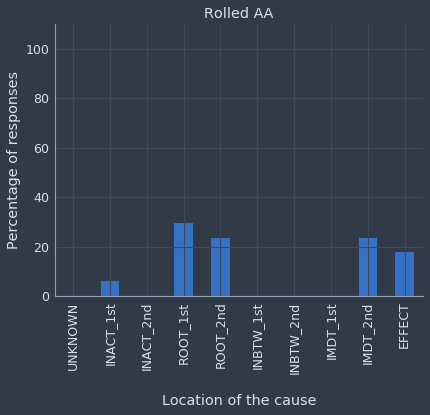

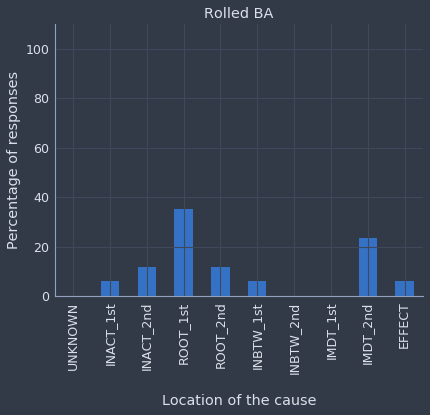

In [16]:
# Same as the general comparison BUT only for the condition 'right'

chainS = Chain(stim='ChainS').add_filter(sampling='right')
chainC = Chain(stim='ChainC').add_filter(sampling='right')
Unrolled_state = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True)
Unrolled_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='A')
Unrolled_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='B')
Unrolled_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right')
Unrolled_AA = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right',root_1st='A')
Unrolled_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right',root_1st='B')
Unrolled_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False)
Unrolled_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False,root_1st='A')
Unrolled_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False,root_1st='B')
Rolled_state = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=True)
Rolled_stateA = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='A')
Rolled_stateB = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='B')
Rolled_AA = AndGate(rolled=True,continuity='root_1st').add_filter(sampling='right')
Rolled_BA = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=False)

graph([chainS,chainC],['Chain squares','Chain circles'])
graph([Unrolled_state,Unrolled_stateA,Unrolled_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([Unrolled_AA_BB,Unrolled_AA,Unrolled_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([Unrolled_AB_BA,Unrolled_AB,Unrolled_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])
graph([Rolled_state,Rolled_stateA,Rolled_stateB],['Rolled A or B in state condition','Rolled A in state condition','Rolled B in state condition'])
graph([Rolled_AA],['Rolled AA'])
graph([Rolled_BA],['Rolled BA'])

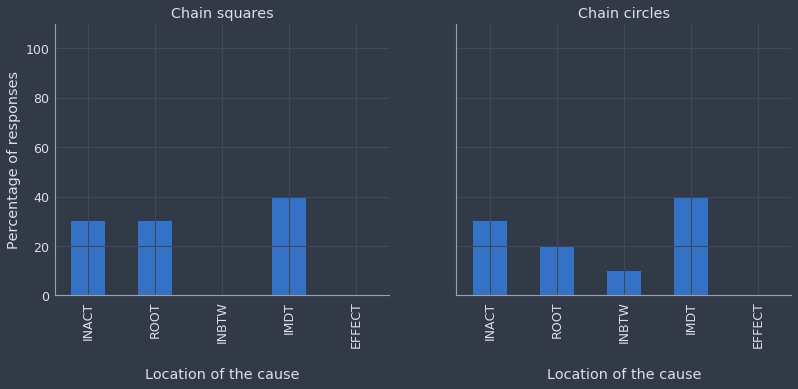

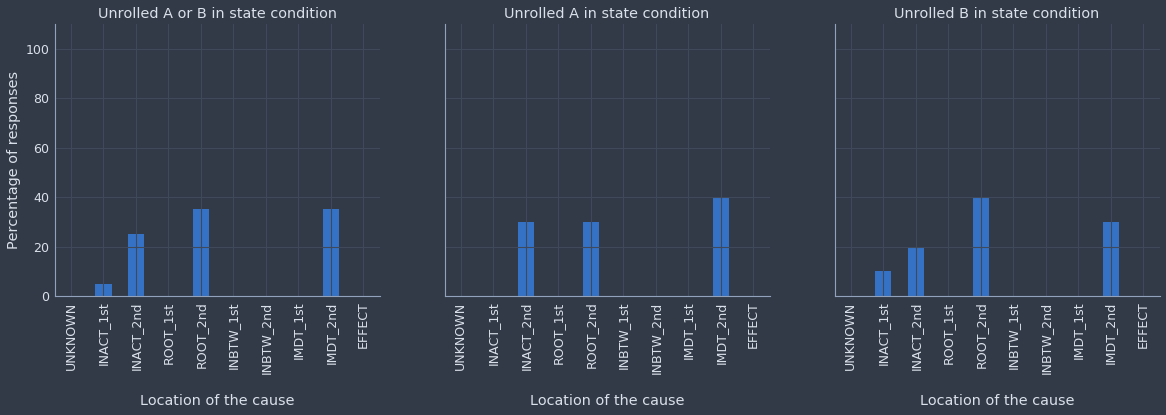

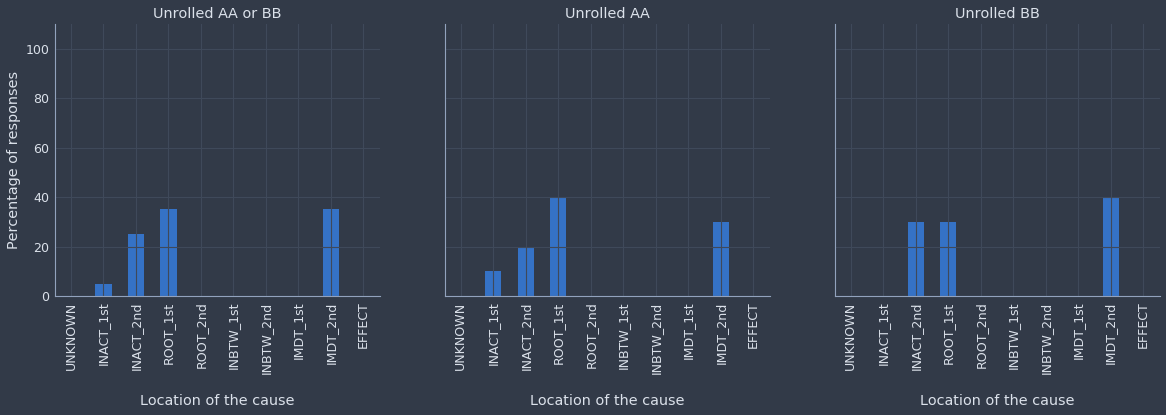

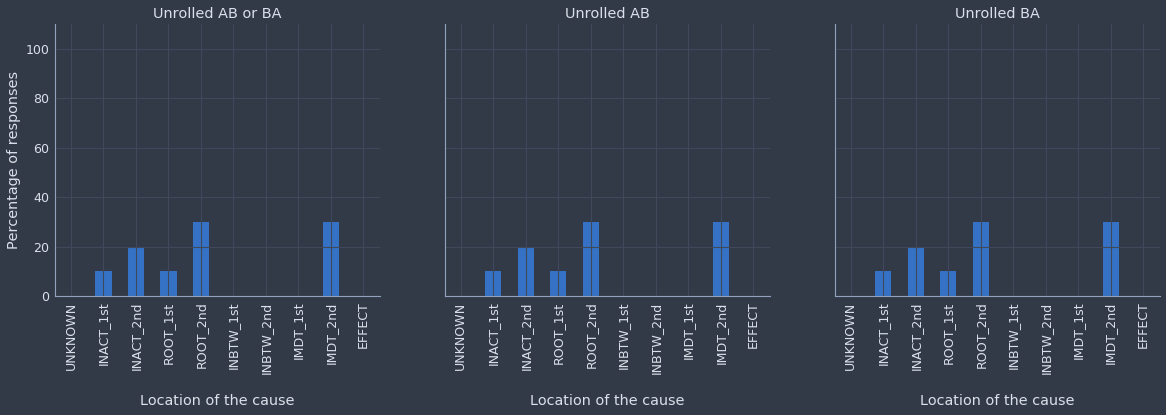

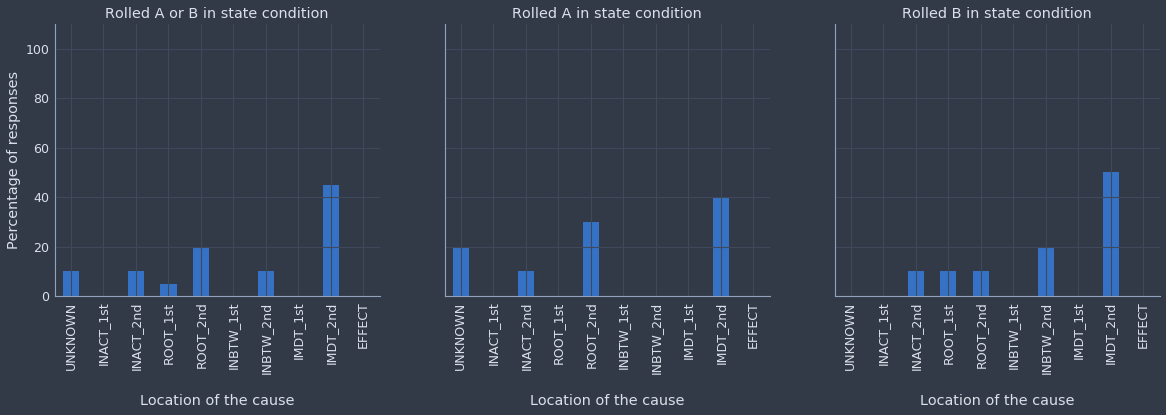

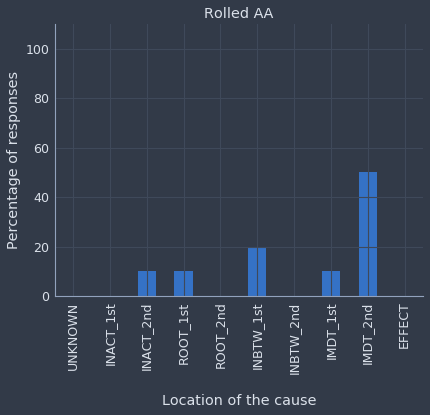

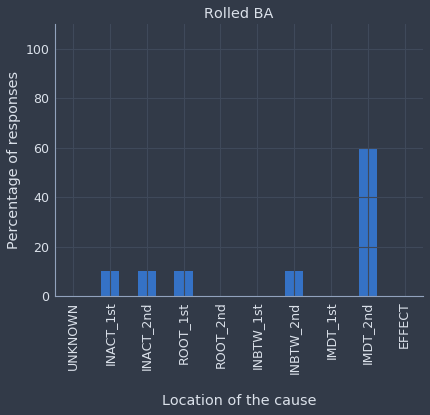

In [17]:
# Same as the general comparison BUT only for the condition 'left'

chainS = Chain(stim='ChainS').add_filter(sampling='left')
chainC = Chain(stim='ChainC').add_filter(sampling='left')
Unrolled_state = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True)
Unrolled_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True,state_branch='A')
Unrolled_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True,state_branch='B')
Unrolled_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',sampling='left')
Unrolled_AA = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left',A_detectors='squares',root_1st='A')
Unrolled_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left',A_detectors='squares',root_1st='B')
Unrolled_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False)
Unrolled_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False,root_1st='A')
Unrolled_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False,root_1st='B')
Rolled_state = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=True)
Rolled_stateA = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=True,state_branch='A')
Rolled_stateB = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=True,state_branch='B')
Rolled_AA = AndGate(rolled=True,continuity='root_1st').add_filter(sampling='left')
Rolled_BA = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=False)

graph([chainS,chainC],['Chain squares','Chain circles'])
graph([Unrolled_state,Unrolled_stateA,Unrolled_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([Unrolled_AA_BB,Unrolled_AA,Unrolled_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([Unrolled_AB_BA,Unrolled_AB,Unrolled_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])
graph([Rolled_state,Rolled_stateA,Rolled_stateB],['Rolled A or B in state condition','Rolled A in state condition','Rolled B in state condition'])
graph([Rolled_AA],['Rolled AA'])
graph([Rolled_BA],['Rolled BA'])

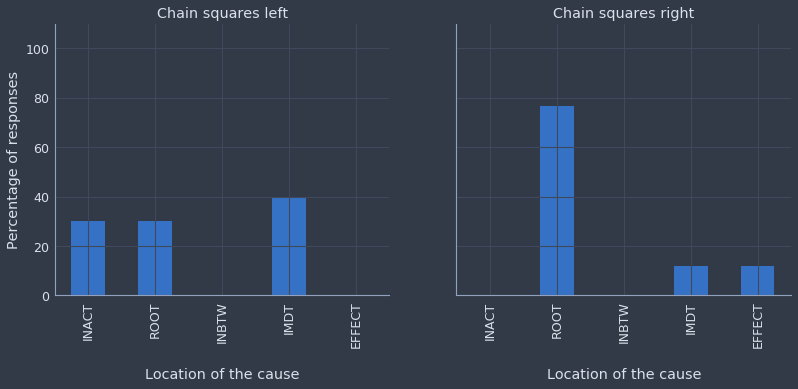

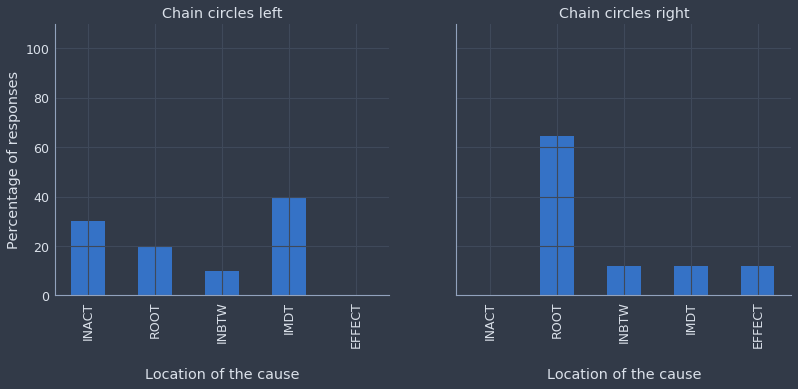

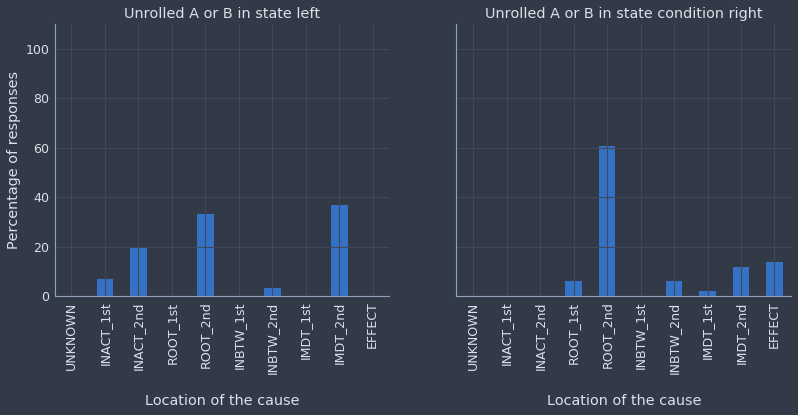

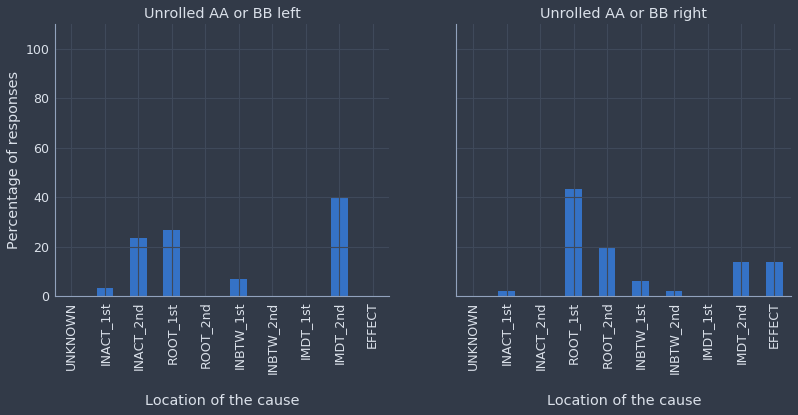

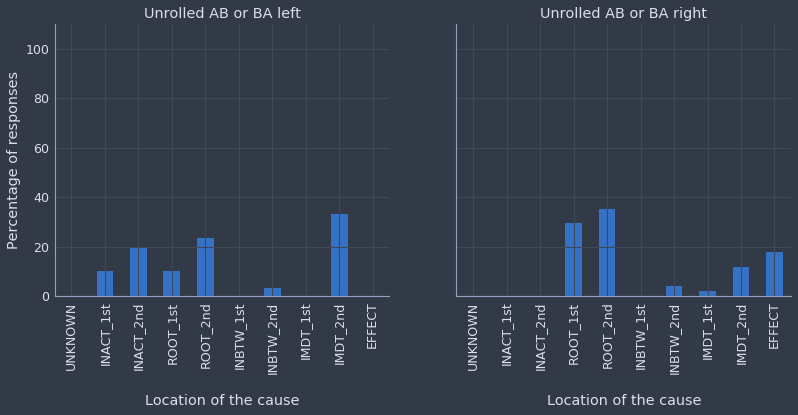

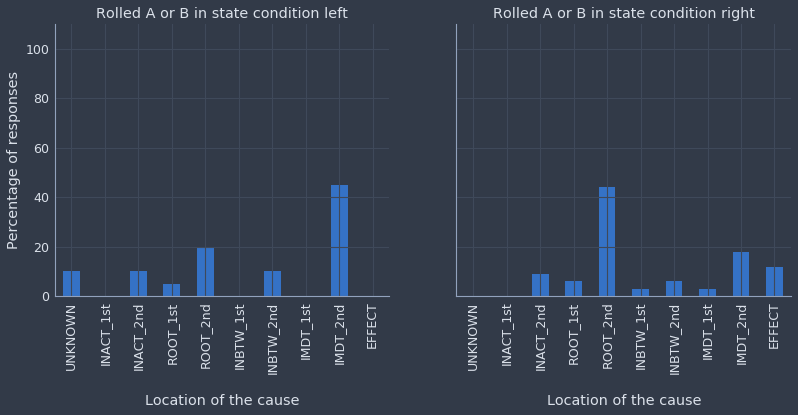

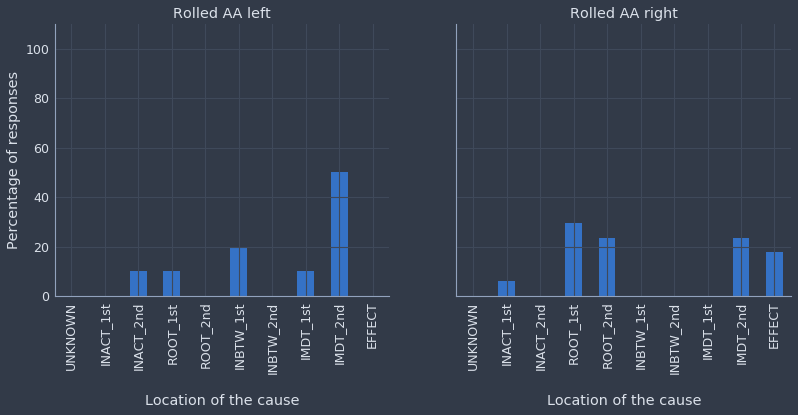

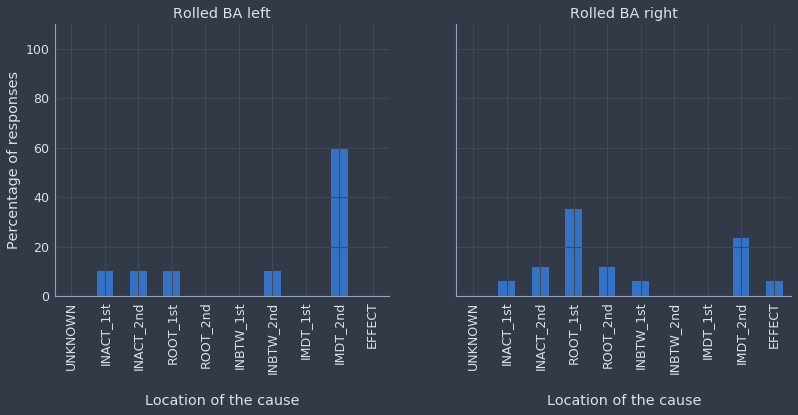

In [18]:
# Broad comparison between right vs left sampling

chainS_Right = Chain(stim='ChainS').add_filter(sampling='right')
chainS_Left = Chain(stim='ChainS').add_filter(sampling='left')
chainC_Right = Chain(stim='ChainC').add_filter(sampling='right')
chainC_Left = Chain(stim='ChainC').add_filter(sampling='left')
Unrolled_state_Right = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True)
Unrolled_state_Left = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',state=True)
Unrolled_AA_BB_Right = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right')
Unrolled_AA_BB_Left = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left')
Unrolled_AB_BA_Right = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False)
Unrolled_AB_BA_Left = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',state=False)
Rolled_state_Right = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=True)
Rolled_state_Left = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=True)
Rolled_AA_Right = AndGate(rolled=True,continuity='root_1st').add_filter(sampling='right')
Rolled_AA_Left = AndGate(rolled=True,continuity='root_1st').add_filter(sampling='left')
Rolled_BA_Right = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=False)
Rolled_BA_Left = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=False)

graph([chainS_Left,chainS_Right],['Chain squares left','Chain squares right'])
graph([chainC_Left,chainC_Right],['Chain circles left','Chain circles right'])
graph([Unrolled_state_Left,Unrolled_state_Right],['Unrolled A or B in state left','Unrolled A or B in state condition right'])
graph([Unrolled_AA_BB_Left,Unrolled_AA_BB_Right],['Unrolled AA or BB left','Unrolled AA or BB right'])
graph([Unrolled_AB_BA_Left,Unrolled_AB_BA_Right],['Unrolled AB or BA left','Unrolled AB or BA right'])
graph([Rolled_state_Left,Rolled_state_Right],['Rolled A or B in state condition left','Rolled A or B in state condition right'])
graph([Rolled_AA_Left,Rolled_AA_Right],['Rolled AA left','Rolled AA right'])
graph([Rolled_BA_Left,Rolled_BA_Right],['Rolled BA left','Rolled BA right'])

## Comparison Top *vs* Bottom

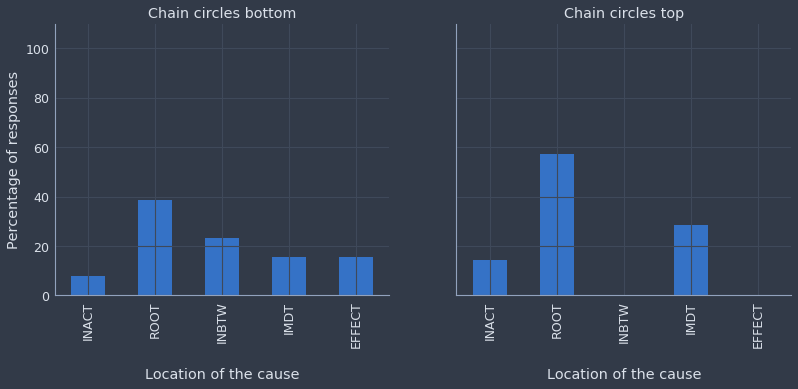

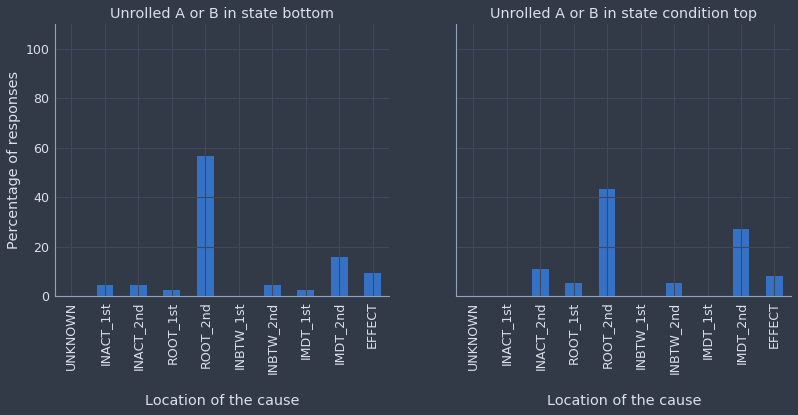

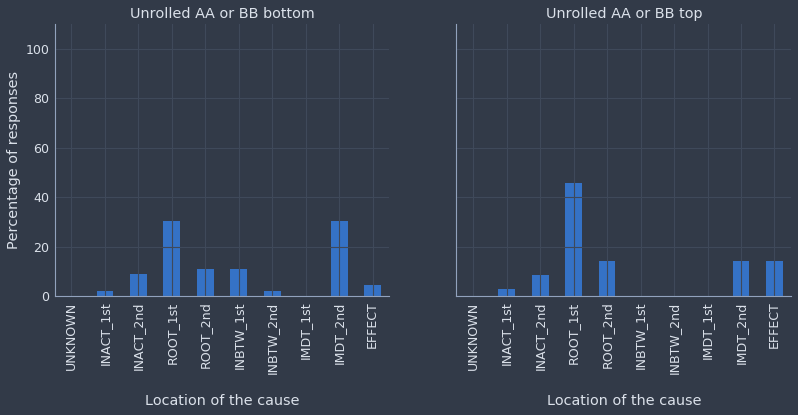

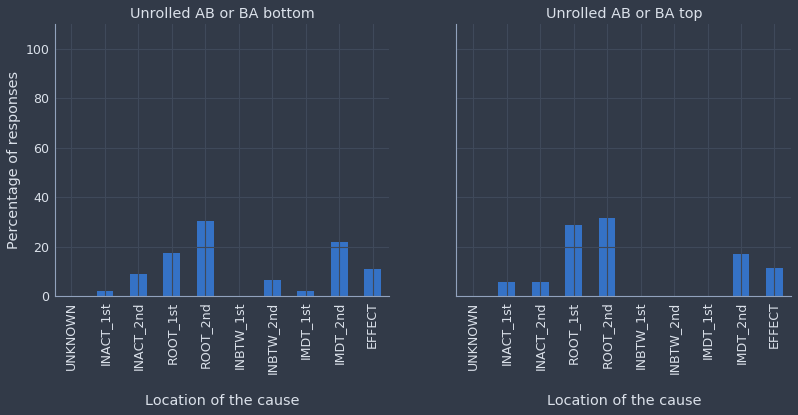

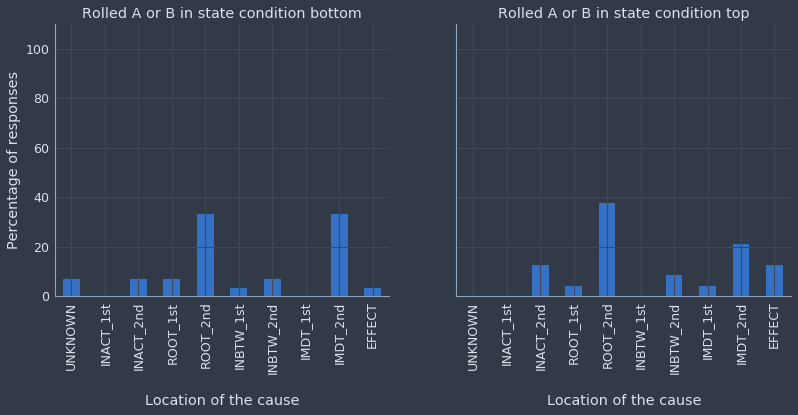

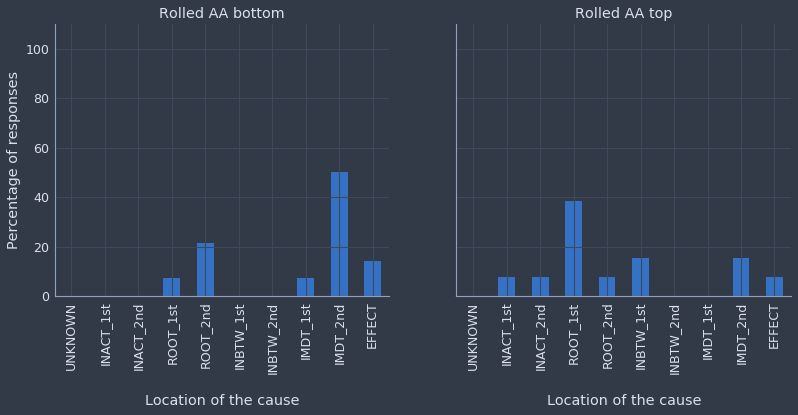

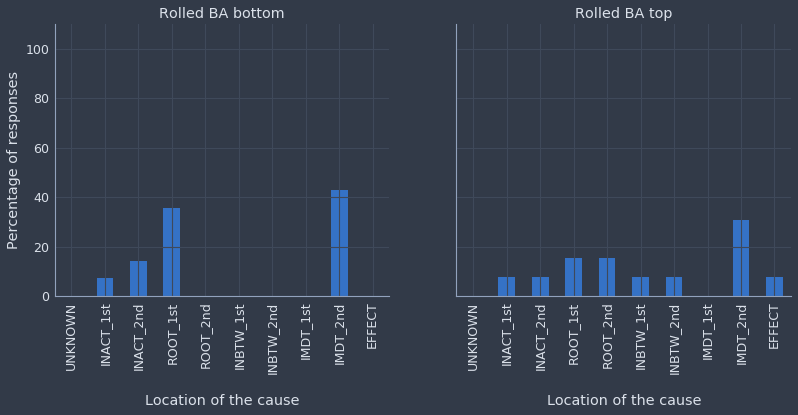

In [21]:
# Broad comparison between TOP vs BOTTOM location of branch A

chainC_Top = Chain(stim='ChainC').add_filter(level='top')
chainC_Bottom = Chain(stim='ChainC').add_filter(level='bottom')
Unrolled_state_Top = AndGate(rolled=False,continuity='root_2nd').add_filter(level='top',state=True)
Unrolled_state_Bottom = AndGate(rolled=False,continuity='root_2nd').add_filter(level='bottom',state=True)
Unrolled_AA_BB_Top = AndGate(rolled=False,continuity='root_1st').add_filter(level='top')
Unrolled_AA_BB_Bottom = AndGate(rolled=False,continuity='root_1st').add_filter(level='bottom')
Unrolled_AB_BA_Top = AndGate(rolled=False,continuity='root_2nd').add_filter(level='top',state=False)
Unrolled_AB_BA_Bottom = AndGate(rolled=False,continuity='root_2nd').add_filter(level='bottom',state=False)
Rolled_state_Top = AndGate(rolled=True,continuity='root_2nd').add_filter(level='top',state=True)
Rolled_state_Bottom = AndGate(rolled=True,continuity='root_2nd').add_filter(level='bottom',state=True)
Rolled_AA_Top = AndGate(rolled=True,continuity='root_1st').add_filter(level='top')
Rolled_AA_Bottom = AndGate(rolled=True,continuity='root_1st').add_filter(level='bottom')
Rolled_BA_Top = AndGate(rolled=True,continuity='root_2nd').add_filter(level='top',state=False)
Rolled_BA_Bottom = AndGate(rolled=True,continuity='root_2nd').add_filter(level='bottom',state=False)

graph([chainC_Bottom,chainC_Top],['Chain circles bottom','Chain circles top'])
graph([Unrolled_state_Bottom,Unrolled_state_Top],['Unrolled A or B in state bottom','Unrolled A or B in state condition top'])
graph([Unrolled_AA_BB_Bottom,Unrolled_AA_BB_Top],['Unrolled AA or BB bottom','Unrolled AA or BB top'])
graph([Unrolled_AB_BA_Bottom,Unrolled_AB_BA_Top],['Unrolled AB or BA bottom','Unrolled AB or BA top'])
graph([Rolled_state_Bottom,Rolled_state_Top],['Rolled A or B in state condition bottom','Rolled A or B in state condition top'])
graph([Rolled_AA_Bottom,Rolled_AA_Top],['Rolled AA bottom','Rolled AA top'])
graph([Rolled_BA_Bottom,Rolled_BA_Top],['Rolled BA bottom','Rolled BA top'])